In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from correlated_noise_q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from hyperparameter_optimization import HyperparameterOptimizer
from gymnasium.wrappers import RescaleAction, ClipAction

import logging

logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s",  # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(
/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



 NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'unitary']
  Instructions with noise: ['custom_kron(rx,ident)_gate']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('custom_kron(rx,ident)_gate', (0, 1))] 

Circuit context
     ┌─────────────────────────────┐     
q_0: ┤0                            ├──■──
     │  custom_kron(rx,ident)_gate │┌─┴─┐
q_1: ┤1                            ├┤ X ├
     └─────────────────────────────┘└───┘


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [2]:
q_env = ContextAwareQuantumEnvironment(gate_q_env_config, circuit_context)
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)

q_env.unwrapped.backend

AerSimulator(''aer_simulator(generic_backend_2q)'
             noise_model=<NoiseModel on ['custom_kron(rx,ident)_gate']>)

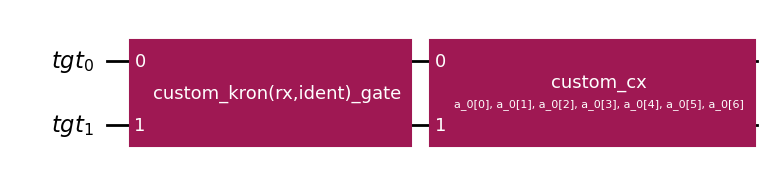

In [3]:
q_env.unwrapped.circuit_truncations[0].draw("mpl")

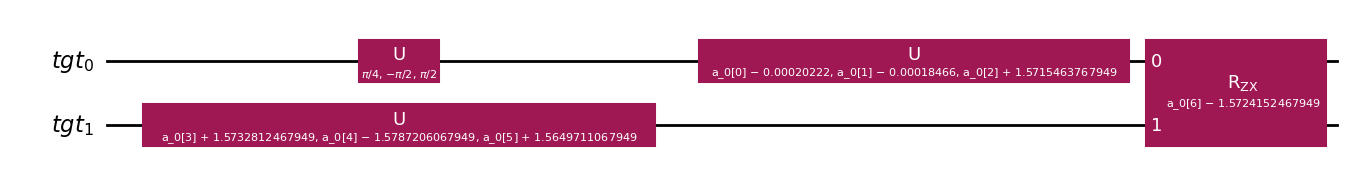

In [4]:
q_env.unwrapped.circuit_truncations[0].decompose().draw("mpl")

In [9]:
current_dir = os.getcwd()
grand_parent_dir = os.path.dirname(os.path.dirname(current_dir))

path_agent_config = os.path.join(os.path.dirname(grand_parent_dir), "agent_config.yaml")
path_hpo_config = os.path.join(current_dir, "noise_hpo_config.yaml")
save_results_path = "hpo_results"

In [10]:
experimental_penalty_weights = {
    "runtime": 0.01,
    "n_shots": 0.01,
    "batchsize": 0.01,
    "sample_paulis": 0.015,
}

In [11]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config,
    save_results_path=save_results_path,
    experimental_penalty_weights=experimental_penalty_weights,
    log_progress=False,
)

In [12]:
best_trial = optimizer.optimize_hyperparameters(num_hpo_trials=2)

 98%|█████████▊| 600/615 [01:43<00:02,  5.80it/s]

Starting benchmarking...
Fidelity stored 0.999985737462394
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j,
 0.70710678+0.j, 0.5       +0.j])


 98%|█████████▊| 601/615 [01:43<00:03,  4.53it/s]

Finished Estimator job
mean tensor([-0.0422, -0.2090,  0.2350, -0.0578,  0.0808,  0.0819,  0.0556])
sigma tensor([0.0478, 0.0120, 0.0115, 0.0105, 0.0135, 0.0159, 0.0094])
DFE Rewards Mean: 0.49998642814576144
DFE Rewards standard dev 0.0005450521638361367
Returns Mean: 0.6931206
Returns standard dev: 0.0010900603
Advantages Mean: 0.0018244734
Advantages standard dev 0.0010900603
Starting benchmarking...
Fidelity stored 0.9999842437511036
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])
Finished Estimator job


 98%|█████████▊| 603/615 [01:44<00:02,  5.12it/s]

mean tensor([-0.0522, -0.2134,  0.2367, -0.0557,  0.0790,  0.0803,  0.0522])
sigma tensor([0.0491, 0.0130, 0.0136, 0.0092, 0.0126, 0.0179, 0.0100])
DFE Rewards Mean: 0.49995384685499433
DFE Rewards standard dev 0.0004639307566521815
Returns Mean: 0.6930553
Returns standard dev: 0.000927783
Advantages Mean: -0.004087888
Advantages standard dev 0.000927783
Starting benchmarking...
Fidelity stored 0.9999851312761763
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])
Finished Estimator job
mean tensor([-0.0494, -0.2176,  0.2345, -0.0543,  0.0788,  0.0754,  0.0517])
sigma tensor([0.0425, 0.0134, 0.0132, 0.0094, 0.0121, 0.0154, 0.0099])
DFE Rewards Mean: 0.500032613615089
DFE Rewards standard dev 0.00048810384442346554
Returns Mean: 0.69321287
Returns standard dev: 0.0009763495
Advantages Mean: -0.026467664
Advantages st

 98%|█████████▊| 604/615 [01:44<00:02,  5.28it/s]

Finished Estimator job
mean tensor([-0.0406, -0.2177,  0.2378, -0.0539,  0.0796,  0.0779,  0.0563])
sigma tensor([0.0391, 0.0140, 0.0137, 0.0094, 0.0113, 0.0153, 0.0117])
DFE Rewards Mean: 0.4999976852692499
DFE Rewards standard dev 2.719718152915731e-06
Returns Mean: 0.6931426
Returns standard dev: 5.439681e-06
Advantages Mean: 0.0037796085
Advantages standard dev 5.4395255e-06
Starting benchmarking...
Fidelity stored 0.9999878267654199
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])
Finished Estimator job


 99%|█████████▊| 606/615 [01:44<00:01,  5.60it/s]

mean tensor([-0.0421, -0.2266,  0.2343, -0.0552,  0.0771,  0.0756,  0.0558])
sigma tensor([0.0383, 0.0133, 0.0130, 0.0097, 0.0096, 0.0160, 0.0111])
DFE Rewards Mean: 0.4999814728442942
DFE Rewards standard dev 0.0005204291898269814
Returns Mean: 0.69311064
Returns standard dev: 0.0010406893
Advantages Mean: 0.0018376336
Advantages standard dev 0.0010406893
Starting benchmarking...
Fidelity stored 0.9999869037349812
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])
Finished Estimator job
mean tensor([-0.0511, -0.2283,  0.2329, -0.0536,  0.0758,  0.0770,  0.0596])
sigma tensor([0.0333, 0.0148, 0.0126, 0.0080, 0.0109, 0.0134, 0.0107])
DFE Rewards Mean: 0.4999991996925855
DFE Rewards standard dev 1.7466037116725333e-06
Returns Mean: 0.6931456
Returns standard dev: 3.4943657e-06
Advantages Mean: -0.009496743
Advantages standard dev 3.494361e-06
Starting benchmarking...
Fidelity stored 0.99998

 99%|█████████▊| 607/615 [01:44<00:01,  5.72it/s]

Finished Estimator job
mean tensor([-0.0550, -0.2309,  0.2320, -0.0558,  0.0740,  0.0803,  0.0611])
sigma tensor([0.0337, 0.0137, 0.0104, 0.0077, 0.0093, 0.0116, 0.0093])
DFE Rewards Mean: 0.4999542453608693
DFE Rewards standard dev 0.0005107640435999742
Returns Mean: 0.6930562
Returns standard dev: 0.0010214116
Advantages Mean: -0.005059866
Advantages standard dev 0.0010214116
Starting benchmarking...
Fidelity stored 0.9999823038364644
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])
Finished Estimator job


 99%|█████████▉| 609/615 [01:45<00:01,  5.72it/s]

mean tensor([-0.0616, -0.2362,  0.2275, -0.0566,  0.0745,  0.0813,  0.0573])
sigma tensor([0.0378, 0.0142, 0.0111, 0.0082, 0.0115, 0.0122, 0.0090])
DFE Rewards Mean: 0.49999255075717547
DFE Rewards standard dev 0.00047699458312161697
Returns Mean: 0.69313276
Returns standard dev: 0.0009541083
Advantages Mean: 0.0017943155
Advantages standard dev 0.0009541083
Starting benchmarking...
Fidelity stored 0.9999858132188009
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j,  0.5       +0.j])
Finished Estimator job
mean tensor([-0.0545, -0.2363,  0.2246, -0.0592,  0.0784,  0.0776,  0.0572])
sigma tensor([0.0384, 0.0153, 0.0109, 0.0077, 0.0119, 0.0119, 0.0092])
DFE Rewards Mean: 0.5000152903518329
DFE Rewards standard dev 0.00048150539338865294
Returns Mean: 0.69317824
Returns standard dev: 0.0009631881
Advantages Mean: -0.002420136
Advantag

 99%|█████████▉| 610/615 [01:45<00:00,  5.76it/s]

Finished Estimator job
mean tensor([-0.0485, -0.2378,  0.2170, -0.0610,  0.0834,  0.0726,  0.0624])
sigma tensor([0.0423, 0.0160, 0.0124, 0.0094, 0.0128, 0.0130, 0.0109])
DFE Rewards Mean: 0.4999791313183393
DFE Rewards standard dev 0.0004965844193052885
Returns Mean: 0.69310594
Returns standard dev: 0.0009930806
Advantages Mean: -0.006218015
Advantages standard dev 0.0009930806
Starting benchmarking...
Fidelity stored 0.999983572246916
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Finished Estimator job


100%|█████████▉| 612/615 [01:45<00:00,  5.80it/s]

mean tensor([-0.0513, -0.2343,  0.2187, -0.0612,  0.0858,  0.0708,  0.0596])
sigma tensor([0.0448, 0.0174, 0.0141, 0.0099, 0.0130, 0.0129, 0.0113])
DFE Rewards Mean: 0.4999984932424362
DFE Rewards standard dev 2.315000651223592e-06
Returns Mean: 0.69314414
Returns standard dev: 4.6287605e-06
Advantages Mean: 0.0015627951
Advantages standard dev 4.628713e-06
Starting benchmarking...
Fidelity stored 0.99998061322353
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j,  0.5       +0.j])
Finished Estimator job
mean tensor([-0.0592, -0.2356,  0.2206, -0.0615,  0.0851,  0.0681,  0.0606])
sigma tensor([0.0460, 0.0141, 0.0121, 0.0096, 0.0125, 0.0120, 0.0100])
DFE Rewards Mean: 0.49999432425416906
DFE Rewards standard dev 0.0005473721359597305
Returns Mean: 0.69313645
Returns standard dev: 0.0010947131
Advantages Mean: 0.0023015493
Advantages 

100%|█████████▉| 613/615 [01:45<00:00,  5.85it/s]

Finished Estimator job
mean tensor([-0.0596, -0.2365,  0.2198, -0.0622,  0.0834,  0.0683,  0.0626])
sigma tensor([0.0471, 0.0125, 0.0117, 0.0106, 0.0143, 0.0118, 0.0111])
DFE Rewards Mean: 0.5000224429413676
DFE Rewards standard dev 0.0005308686743046195
Returns Mean: 0.6931926
Returns standard dev: 0.0010618843
Advantages Mean: -0.008616896
Advantages standard dev 0.0010618843
Starting benchmarking...
Fidelity stored 0.9999806262882425
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])
Finished Estimator job


100%|██████████| 615/615 [01:46<00:00,  5.79it/s]
[I 2024-03-20 11:12:39,351] Trial 1 finished with value: 18.962011278548278 and parameters: {'N_UPDATES': 615, 'N_EPOCHS': 21, 'MINIBATCH_SIZE': 24, 'BATCHSIZE_MULTIPLIER': 7, 'LR': 0.0017288475830480486, 'N_SHOTS': 629, 'SAMPLE_PAULIS': 662, 'GAMMA': 0.962748646055653, 'GAE_LAMBDA': 0.9931767669523157, 'ENT_COEF': 0.0005618497630435358, 'V_COEF': 0.3042562107306344, 'GRADIENT_CLIP': 0.7468859268104828, 'CLIP_VALUE_COEF': 0.277733064033476, 'CLIP_RATIO': 0.29806019082978474}. Best is trial 1 with value: 18.962011278548278.


mean tensor([-0.0549, -0.2370,  0.2191, -0.0647,  0.0853,  0.0653,  0.0625])
sigma tensor([0.0491, 0.0124, 0.0114, 0.0120, 0.0135, 0.0109, 0.0105])
DFE Rewards Mean: 0.5000211310109764
DFE Rewards standard dev 0.0005181469149593822
Returns Mean: 0.69319
Returns standard dev: 0.0010362676
Advantages Mean: -0.0013095726
Advantages standard dev 0.0010362676
Starting benchmarking...
Fidelity stored 0.9999820231944156
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j, -0.5       +0.j])
Finished Estimator job
mean tensor([-0.0491, -0.2408,  0.2189, -0.0660,  0.0783,  0.0692,  0.0634])
sigma tensor([0.0496, 0.0109, 0.0099, 0.0117, 0.0158, 0.0108, 0.0109])
DFE Rewards Mean: 0.49997110416198154
DFE Rewards standard dev 0.00043817312672292364
Returns Mean: 0.6930898
Returns standard dev: 0.00087627565
Advantages Mean: 0.0075819422
Advantages 

In [ ]:
best_trial

{'training_results': {'avg_reward': [0.4983595098604656,
   0.4987372902670991,
   0.498643262179983,
   0.49881959602293996,
   0.4991984037175882,
   0.49912359460948735,
   0.49920519589774415,
   0.4993842004458395,
   0.4994922861214336,
   0.49939956547414466,
   0.4996007408594973,
   0.49945732833224327,
   0.4995656046131908,
   0.49966995045317797,
   0.4996550730571249,
   0.4997667526561726,
   0.4998189135051016,
   0.4997626003083877,
   0.49979812922120365,
   0.4997961807497722,
   0.4998057669765774,
   0.49988353173860317,
   0.4998865150389627,
   0.4999174796319066,
   0.4999087752850816,
   0.49982098250488305,
   0.49995932012906646,
   0.4998914011105516,
   0.49984555465333985,
   0.4999376800506615,
   0.49990870758579126,
   0.4999452126618001,
   0.4999572510110562,
   0.49995506559135544,
   0.4999195523909341,
   0.4999676059484367,
   0.4999747707832059,
   0.499963364057427,
   0.49997278552551433,
   0.49989992148542134,
   0.49992874830352996,
   0.4999